In [ ]:
import sys
import os
import numpy as np
import mne
import matplotlib.pyplot as plt
import pickle
from collections import defaultdict
from pyprep.find_noisy_channels import NoisyChannels

# Add the workspace root to the Python path
workspace_root = os.path.abspath("..")
if workspace_root not in sys.path:
    sys.path.append(workspace_root)

from functions import preprocess
ids = list(range(601, 619))
bad_channels = {}
for id in ids:
    subject = preprocess(id)
    raw = subject.raw
    det = NoisyChannels(raw, do_detrend=True)
    det.find_all_bads(ransac=False)
    bad_channels[id] = det.get_bads(as_dict=True)

with open("bad_channels.pkl", "wb") as f:
    pickle.dump(bad_channels, f)

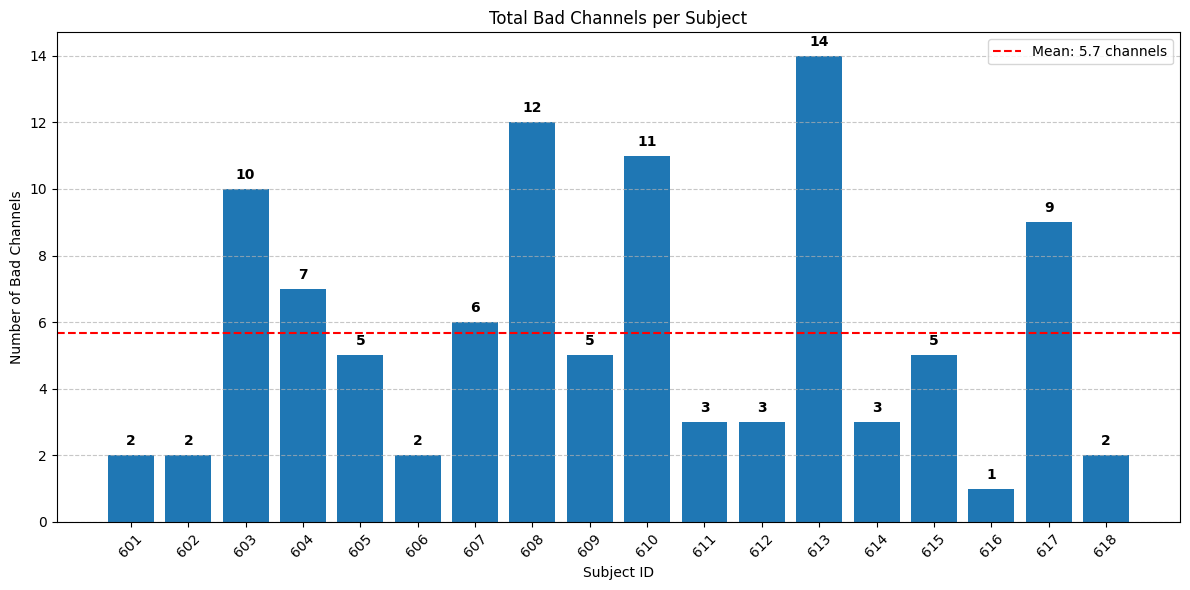

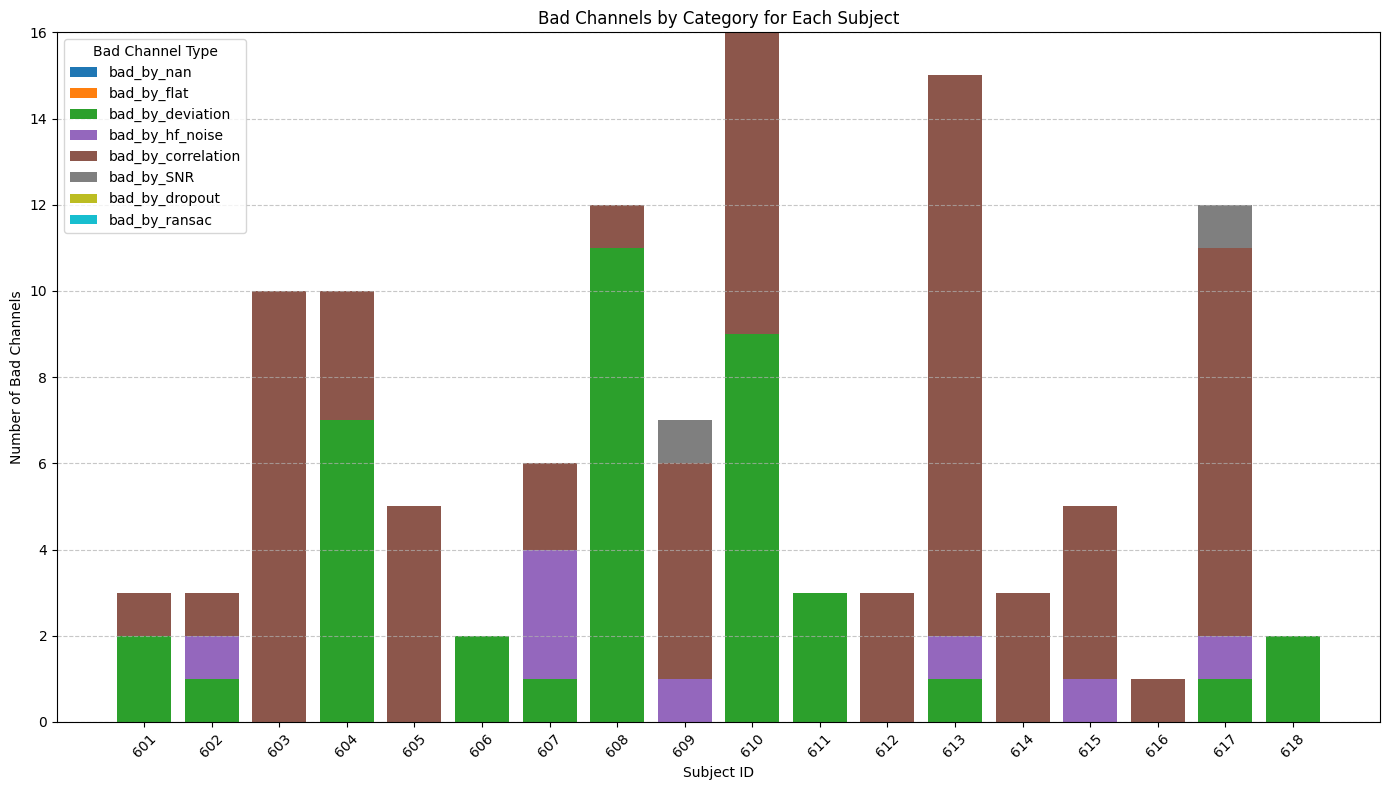

Summary Statistics for Bad Channels:
Average total bad channels per subject: 5.67
Maximum bad channels: 14 (Subject 613)
Minimum bad channels: 1 (Subject 616)

Average by category:
  bad_by_nan: 0.00
  bad_by_flat: 0.00
  bad_by_deviation: 2.22
  bad_by_hf_noise: 0.44
  bad_by_correlation: 3.78
  bad_by_SNR: 0.11
  bad_by_dropout: 0.00
  bad_by_ransac: 0.00


In [2]:

import sys
import os
import numpy as np
import mne
import matplotlib.pyplot as plt
import pickle
from collections import defaultdict
from pyprep.find_noisy_channels import NoisyChannels

# Add the workspace root to the Python path
workspace_root = os.path.abspath("..")
if workspace_root not in sys.path:
    sys.path.append(workspace_root)

# Load the bad channels data
with open("bad_channels.pkl", "rb") as f:
    bad_channels = pickle.load(f)

# Count total bad channels for each subject
subject_ids = sorted(bad_channels.keys())
total_bad_counts = []
bad_types = defaultdict(list)

# Dynamically extract bad channel counts by type and total
for subject_id in subject_ids:
    # Count total bad channels
    all_bad_channels = set()
    for category, channels in bad_channels[subject_id].items():
        if category != "bad_all":  # Exclude the 'bad_all' category
            all_bad_channels.update(channels)
    total_bad_counts.append(len(all_bad_channels))
    
    # Count by type using the actual keys in the dictionary
    for category in bad_channels[subject_id].keys():
        if category != "bad_all":  # Exclude the 'bad_all' category
            bad_types[category].append(len(bad_channels[subject_id][category]))

# Create figure for total bad channels per subject
plt.figure(figsize=(12, 6))
bars = plt.bar(subject_ids, total_bad_counts)

# Add count labels above each bar
for bar, count in zip(bars, total_bad_counts):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.3, 
             str(count), ha='center', fontweight='bold')

plt.axhline(y=np.mean(total_bad_counts), color='r', linestyle='--', 
            label=f'Mean: {np.mean(total_bad_counts):.1f} channels')

plt.xlabel('Subject ID')
plt.ylabel('Number of Bad Channels')
plt.title('Total Bad Channels per Subject')
plt.xticks(subject_ids, rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.savefig("total_bad_channels.png", dpi=300)
plt.show()

# Create a stacked bar plot showing the breakdown by category
plt.figure(figsize=(14, 8))
bottom = np.zeros(len(subject_ids))

# Define a color map for different categories
colors = plt.cm.tab10(np.linspace(0, 1, len(bad_types)))
category_names = list(bad_types.keys())  # Use the actual keys from the dictionary

for i, category in enumerate(category_names):
    plt.bar(subject_ids, bad_types[category], bottom=bottom, 
            label=category, color=colors[i])
    bottom += np.array(bad_types[category])

plt.xlabel('Subject ID')
plt.ylabel('Number of Bad Channels')
plt.title('Bad Channels by Category for Each Subject')
plt.xticks(subject_ids, rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Bad Channel Type')
plt.tight_layout()
plt.savefig("bad_channels_by_category.png", dpi=300)
plt.show()

# Print summary statistics
print("Summary Statistics for Bad Channels:")
print(f"Average total bad channels per subject: {np.mean(total_bad_counts):.2f}")
print(f"Maximum bad channels: {np.max(total_bad_counts)} (Subject {subject_ids[np.argmax(total_bad_counts)]})")
print(f"Minimum bad channels: {np.min(total_bad_counts)} (Subject {subject_ids[np.argmin(total_bad_counts)]})")
print("\nAverage by category:")
for category in category_names:
    print(f"  {category}: {np.mean(bad_types[category]):.2f}")

In [7]:
%matplotlib qt
from functions import preprocess
id = 617
raw = preprocess(id).raw
raw.filter(1, 40, fir_design='firwin')




Extracting EDF parameters from c:\Users\gmoha\Downloads\git\preprocessing_pipline\Data\O_617_Def_OF.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 455167  =      0.000 ...   888.998 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1691 samples (3.303 s)



c:\Users\gmoha\Downloads\git\preprocessing_pipline\functions.py:24: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  xyz_data = pd.read_csv(ch_location_path, delim_whitespace=True, skiprows=1, header=None)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    1.0s


<RawEDF | O_617_Def_OF.bdf, 129 x 455168 (889.0 s), ~448.1 MiB, data loaded>

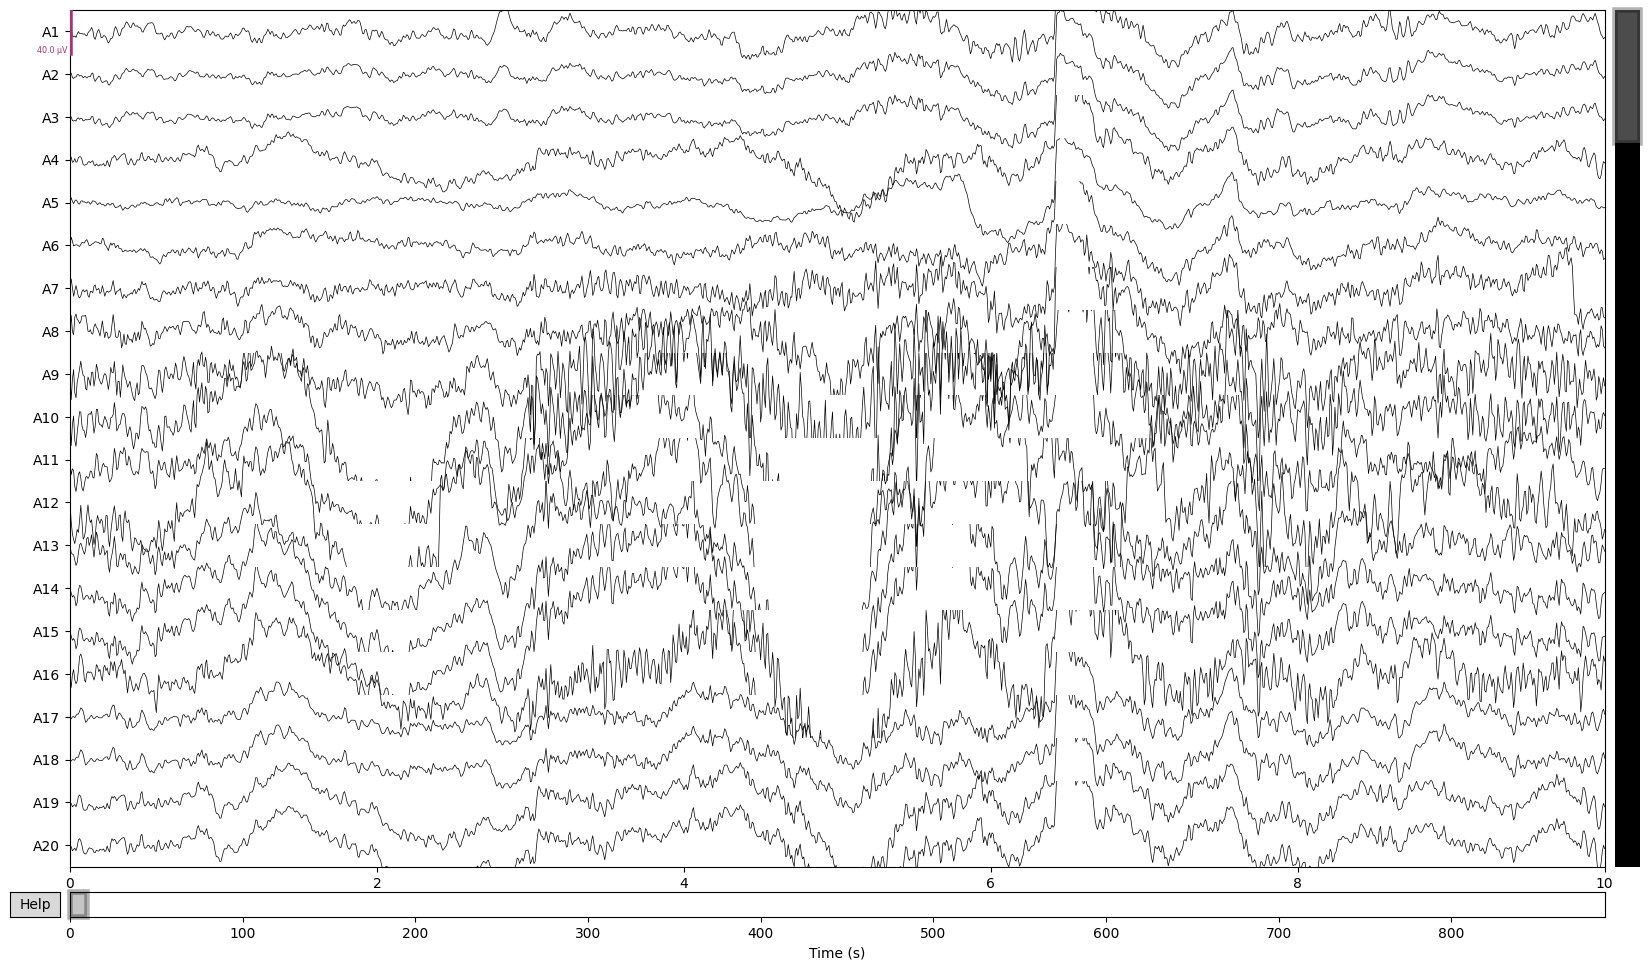

In [8]:
raw.plot()

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 4.000 (s)
Plotting power spectral density (dB=True).


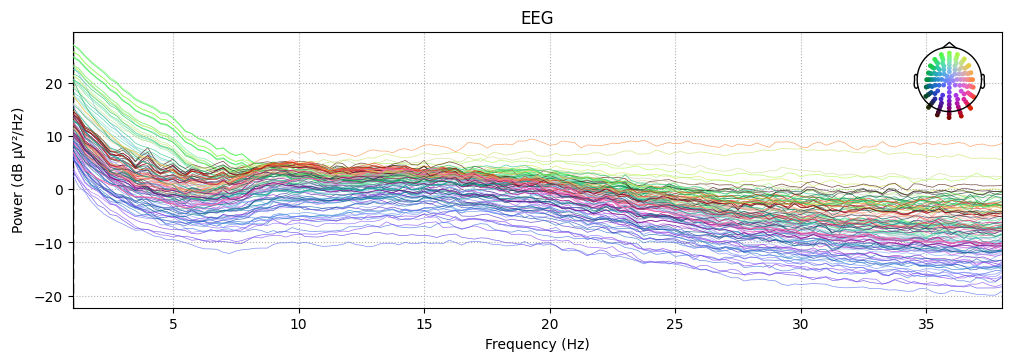

In [5]:
raw.plot_psd(fmin=1, fmax = 38)